In [27]:
import volta

In this example file a group of networks is clustered into groups based on different similarities of their nodes, edges & structural properties

# Load & Pre-Process Networks

The first step of the pipeline consists in loading the chosen data set.
You can store your networks in any common format, however the VOLTA package requires that the networks are provided as NetworkX Graph objects (refer to its documentation for detailed instructions). Moreover, the networks should be weighted: if you have an unweighted network, then assign all edges the same edge weight. The package assumes "weight" to be the default edge weight label, but this can be set when needed.

An example on how to pre-process a network, stored as an edgelist, is provided below. Different loading and storing examples are provided in the "import and export of networks" jupyter notebook. 

In [28]:
#location where the raw data files are stored, it is set to run from the installation folder
#- if applicable please CHANGE or CHANGE to the location of your networks

graph_location = "../networks/edgelists/"


In [29]:
#location where output should be saved
#Please set location
location = ""


In [30]:
import glob
import pandas as pd
import networkx as nx
import numpy as np

In [31]:

labels = []
networks_graphs = []

print("load networks")
#gets all files located in the specified folder that end on .edgelist
#CHANGE the ending if your files end differently
for path in glob.glob(graph_location +"*.edgelist"):
    
    #you can specify that only part of the file name should be used as network name for later identification
    name =  path.split("/")[-1].replace(".rds.edgelist", "")
    
    
    #read the edgelist file as a dataframe
    fh = pd.read_csv(path, sep="\t")
    #convert it into a NetworkX graph G and specify the column names of the node pairs
    G=nx.from_pandas_edgelist(fh, "V1", "V2")
    
    #if you have an unweighted network assign all edges the same edge weight - here a value of 1 is assigned
    for u, v, d in G.edges(data=True):
        d['weight'] = 1
        
    
    #save the graph objects to a list (only suitable if small networks are processed)
    #this is the main objects used for the examples below, which contains all networks
    networks_graphs.append(G)
    labels.append(name)
   

    

    print("loaded", name)

load networks
loaded dasatinib_A375
loaded dasatinib_A549
loaded dasatinib_ASC
loaded dasatinib_BT20
loaded dasatinib_CD34
loaded dasatinib_HA1E
loaded dasatinib_HCC515
loaded dasatinib_HEPG2
loaded dasatinib_HME1
loaded dasatinib_HS578T
loaded dasatinib_HT29
loaded dasatinib_HUVEC
loaded dasatinib_MCF10A
loaded dasatinib_MCF7
loaded dasatinib_MDAMB231
loaded dasatinib_NEU
loaded dasatinib_NPC
loaded dasatinib_PC3
loaded dasatinib_SKBR3
loaded dasatinib_SKL
loaded mitoxantrone_A549


The networkX graph object is converted into a list of lists format

In [32]:
networks = volta.get_node_similarity.preprocess_graph(networks_graphs, attribute="weight")

Optional: If multiple networks are provided, get the union of nodes between them in order to ensure that all node names are mapped to the correct IDs (if this transformation is applied)

In [33]:
network_lists, mapping = volta.get_node_similarity.preprocess_node_list(networks)

In [34]:
import pickle

In [35]:
#save the mapping for later

with open(location + "node_id_mapping.pckl", "wb") as f:
    pickle.dump(mapping, f, protocol=4)

# Node Similarity

In this example, we will show how to compute node properties, such as: degree centrality, betweenness centrality and closeness centrality, of the shared nodes between the networks (when you have networks with different nodes). 

In the example the volta.get_node_similarity function is used. It is a wrapper function - if you are only interested in one output you can call the underlying functions directly, for this please refer to the documentation

Outputs:
sorted_nodes contains the node ids sorted after the selected properties as well as the mean and median ranking

shared_nodes contains for each nodes in how many networks it occures (this may be useful for networks that do not have the same nodes)

binary contains the shared nodes in a binary representation

centrality_values contains the selected properties for each node


Notes:
You can select which parameters are the most suitable for you analysis. Make sure to remove the asynchrone option when running in jupyter notebooks. 



In [36]:
sorted_nodes, shared_nodes, binary, centrality_values = volta.get_node_similarity.sort_list_and_get_shared(network_lists, mapping, networks_graphs, labels, degree_centrality=True, closeness_centrality=True, betweenness=True, degree=False, in_async=False)

dasatinib_A375
dasatinib_A549
dasatinib_ASC
dasatinib_BT20
dasatinib_CD34
dasatinib_HA1E
dasatinib_HCC515
dasatinib_HEPG2
dasatinib_HME1
dasatinib_HS578T
dasatinib_HT29
dasatinib_HUVEC
dasatinib_MCF10A
dasatinib_MCF7
dasatinib_MDAMB231
dasatinib_NEU
dasatinib_NPC
dasatinib_PC3
dasatinib_SKBR3
dasatinib_SKL
mitoxantrone_A549
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
average position is calculated
1
2
3
av

In order to calculate multiple distances between the networks, the volta.get_node_similarity.estimate_similarities_nodes function can be used. 

Similarly, this is a wrapper function calling different distance measures: if you are interested in only one distance you can use the single function directly. If not all values are needed to be calculated you can use the individual functions called in the wrapper. For this refer to the documentation.

This wrapper returns distance/similarity matrices of jaccard similarity, jaccard distance, percentage of shared nodes, kendall rank correlation of degree centrality, closeness centrality and betweenness centrality and mean / median ranking as well as the corresponding p-values for the top and bottom kendall_x nodes (or as here all nodes), hamming distance and SMC similarity.

In [37]:
j, jd, percentage, kendall_dc_top, b_dc_top, kendall_cc_top, b_cc_top, kendall_betweenness_top, b_b_top, kendall_avg_top, b_avg_top, hamming, kendall_dc_bottom , b_dc_bottom , kendall_cc_bottom , b_cc_bottom , kendall_betweenness_bottom , b_b_bottom , kendall_avg_bottom , b_avg_bottom , smc, kendall_med_top, b_med_top, kendall_med_bottom, b_med_bottom =volta.get_node_similarity.estimate_similarities_nodes(network_lists, sorted_nodes, binary,  kendall_x=len(mapping), is_file=False, in_async=False)

kendall top
check if kendall x is small enough 
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(6, 

(13, 16)
(13, 17)
(13, 18)
(13, 19)
(13, 20)
(14, 0)
(14, 1)
(14, 2)
(14, 3)
(14, 4)
(14, 5)
(14, 6)
(14, 7)
(14, 8)
(14, 9)
(14, 10)
(14, 11)
(14, 12)
(14, 13)
(14, 14)
(14, 15)
(14, 16)
(14, 17)
(14, 18)
(14, 19)
(14, 20)
(15, 0)
(15, 1)
(15, 2)
(15, 3)
(15, 4)
(15, 5)
(15, 6)
(15, 7)
(15, 8)
(15, 9)
(15, 10)
(15, 11)
(15, 12)
(15, 13)
(15, 14)
(15, 15)
(15, 16)
(15, 17)
(15, 18)
(15, 19)
(15, 20)
(16, 0)
(16, 1)
(16, 2)
(16, 3)
(16, 4)
(16, 5)
(16, 6)
(16, 7)
(16, 8)
(16, 9)
(16, 10)
(16, 11)
(16, 12)
(16, 13)
(16, 14)
(16, 15)
(16, 16)
(16, 17)
(16, 18)
(16, 19)
(16, 20)
(17, 0)
(17, 1)
(17, 2)
(17, 3)
(17, 4)
(17, 5)
(17, 6)
(17, 7)
(17, 8)
(17, 9)
(17, 10)
(17, 11)
(17, 12)
(17, 13)
(17, 14)
(17, 15)
(17, 16)
(17, 17)
(17, 18)
(17, 19)
(17, 20)
(18, 0)
(18, 1)
(18, 2)
(18, 3)
(18, 4)
(18, 5)
(18, 6)
(18, 7)
(18, 8)
(18, 9)
(18, 10)
(18, 11)
(18, 12)
(18, 13)
(18, 14)
(18, 15)
(18, 16)
(18, 17)
(18, 18)
(18, 19)
(18, 20)
(19, 0)
(19, 1)
(19, 2)
(19, 3)
(19, 4)
(19, 5)
(19, 6)
(19,

(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(7, 14)
(7, 1

(5, 20)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(7, 14)
(7, 15)
(7, 16)
(7, 17)
(7, 18)
(7, 19)
(7, 20)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(8, 11)
(8, 12)
(8, 13)
(8, 14)
(8, 15)
(8, 16)
(8, 17)
(8, 18)
(8, 19)
(8, 20)
(9, 0)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(9, 10)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
(9, 15)
(9, 16)
(9, 17)
(9, 18)
(9, 19)
(9, 20)
(10, 0)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
(10, 11)
(10, 12)
(10, 13)
(10, 14)
(10, 15)
(10, 16)
(10, 17)
(10, 18)
(10, 19)
(10, 20)
(11, 0)
(11, 1)
(11, 2)
(11, 3)
(11, 4)
(11, 5)
(11, 6)
(11, 7)
(11, 8)
(11, 9)
(11, 10)
(11, 11)
(11, 12)
(11, 13)
(11, 14)
(11, 15)
(11, 16)
(11, 17)
(11, 18)
(11, 19)
(11, 20)
(1

This distances can be merged into a single distance matrix or used individually.

Since all networks have the same nodes, we will only use the average rank correlation matrix previously computed, but transform it into a distance - the correlation value c is transformed to a distance with (1-c)/2. The distances will then be plotted as a heatmap. 

In [38]:
import numpy as np

In [39]:
mean_dist = kendall_avg_top.copy()

for index, x in np.ndenumerate(mean_dist):
    d = (1-x)/2
    
    mean_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        mean_dist[index[0]][index[1]] = 0

In [40]:
mean_dist_nodes = mean_dist.copy()

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

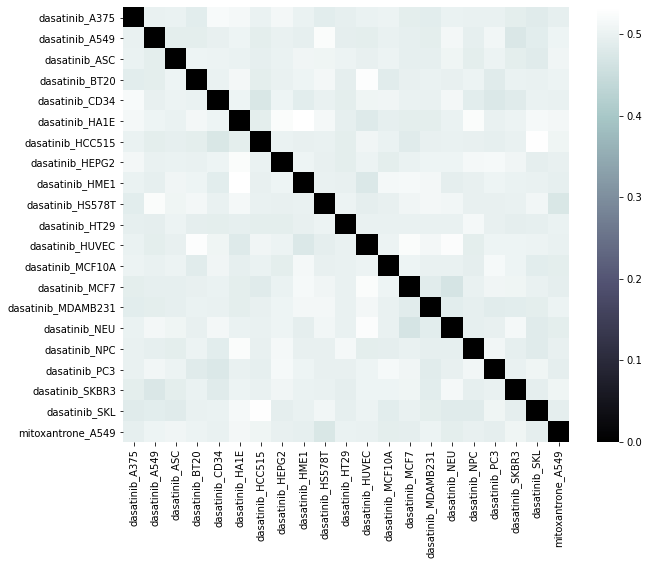

In [42]:
f = volta.plotting.plot_heatmap(mean_dist, xlabels=labels, ylabels = labels)

# Edge Similarity

In this second example, we will use the same preprocessed networks to compute edge similarity. 

Since the networks used here (when using the example networks) were originally unweighted, we assigned each edge its edge betweenness value as weight and compared the networks based on this value for shared edges. If you are working with weighted networks you can either use the original edge weights or estimate their weighted/ unweighted betweenness values. 

In [43]:
#sort edges after edge betweenness and assign to the graph objects
bet = []
graphs_with_betweenness = []
for net in networks_graphs:
    edges_betweenness = nx.edge_betweenness_centrality(net)
    bet.append(edges_betweenness)
    #write as new attribute to graph
    temp = nx.set_edge_attributes(net, edges_betweenness, "betweenness")
    

We need to convert the networks again into the list of lists format, since this time the betweeness values will be used and assign each edge an id. 

In [44]:
networks = volta.get_edge_similarity.preprocess_graph(networks_graphs, attribute="betweenness")



network_lists, mapping = volta.get_edge_similarity.preprocess_edge_list(networks)

#save mapping for later
with open(location + "edge_id_mapping.pckl", "wb") as f:
    pickle.dump(mapping, f, protocol=4)

Sort edges after betweenness values are assigned as weights and estimate for each edge in which network it appears. Here the volta.get_edge_similarity.sort_list_and_get_shared function is used.

In [45]:
sorted_networks, shared_edges, binary = volta.get_edge_similarity.sort_list_and_get_shared(networks, mapping, network_lists, labels, in_async=False)

dasatinib_A375
dasatinib_A549
dasatinib_ASC
dasatinib_BT20
dasatinib_CD34
dasatinib_HA1E
dasatinib_HCC515
dasatinib_HEPG2
dasatinib_HME1
dasatinib_HS578T
dasatinib_HT29
dasatinib_HUVEC
dasatinib_MCF10A
dasatinib_MCF7
dasatinib_MDAMB231
dasatinib_NEU
dasatinib_NPC
dasatinib_PC3
dasatinib_SKBR3
dasatinib_SKL
mitoxantrone_A549


You can now compute distances/ similarities between the networks based on their similarity in edges.

The volta.get_edge_similarity.estimate_similarities_edges wrapper function returns jaccard similarity, jaccard distance, kendall rank coefficient for kendall_x top and bottom edges (here ranked after betweenness), hamming distance and SMC similarity. As before, if only specific distances are needed the individual functions can be called, please refer to the documentation for this.

In [46]:
j, jd, percentage, kendall_top,b_top, kendall_bottom, b_bottom, hamming, smc = volta.get_edge_similarity.estimate_similarities_edges(network_lists, sorted_networks, binary,  kendall_x=100, is_file=False, in_async=False)

check if kendall x is small enough 
(0, 0)
(0, 1)
input lists have different length
(0, 2)
input lists have different length
(0, 3)
input lists have different length
(0, 4)
input lists have different length
(0, 5)
input lists have different length
(0, 6)
input lists have different length
(0, 7)
input lists have different length
(0, 8)
input lists have different length
(0, 9)
input lists have different length
(0, 10)
input lists have different length
(0, 11)
input lists have different length
(0, 12)
input lists have different length
(0, 13)
input lists have different length
(0, 14)
input lists have different length
(0, 15)
input lists have different length
(0, 16)
input lists have different length
(0, 17)
input lists have different length
(0, 18)
input lists have different length
(0, 19)
input lists have different length
(0, 20)
input lists have different length
(1, 0)
(1, 1)
(1, 2)
input lists have different length
(1, 3)
input lists have different length
(1, 4)
input lists have differ

(17, 18)
input lists have different length
(17, 19)
input lists have different length
(17, 20)
input lists have different length
(18, 0)
(18, 1)
(18, 2)
(18, 3)
(18, 4)
(18, 5)
(18, 6)
(18, 7)
(18, 8)
(18, 9)
(18, 10)
(18, 11)
(18, 12)
(18, 13)
(18, 14)
(18, 15)
(18, 16)
(18, 17)
(18, 18)
(18, 19)
input lists have different length
(18, 20)
input lists have different length
(19, 0)
(19, 1)
(19, 2)
(19, 3)
(19, 4)
(19, 5)
(19, 6)
(19, 7)
(19, 8)
(19, 9)
(19, 10)
(19, 11)
(19, 12)
(19, 13)
(19, 14)
(19, 15)
(19, 16)
(19, 17)
(19, 18)
(19, 19)
(19, 20)
input lists have different length
(20, 0)
(20, 1)
(20, 2)
(20, 3)
(20, 4)
(20, 5)
(20, 6)
(20, 7)
(20, 8)
(20, 9)
(20, 10)
(20, 11)
(20, 12)
(20, 13)
(20, 14)
(20, 15)
(20, 16)
(20, 17)
(20, 18)
(20, 19)
(20, 20)
check if kendall x is small enough 
(0, 0)
(0, 1)
input lists have different length
(0, 2)
input lists have different length
(0, 3)
input lists have different length
(0, 4)
input lists have different length
(0, 5)
input lists have d

(14, 15)
input lists have different length
(14, 16)
input lists have different length
(14, 17)
input lists have different length
(14, 18)
input lists have different length
(14, 19)
input lists have different length
(14, 20)
input lists have different length
(15, 0)
(15, 1)
(15, 2)
(15, 3)
(15, 4)
(15, 5)
(15, 6)
(15, 7)
(15, 8)
(15, 9)
(15, 10)
(15, 11)
(15, 12)
(15, 13)
(15, 14)
(15, 15)
(15, 16)
input lists have different length
(15, 17)
input lists have different length
(15, 18)
input lists have different length
(15, 19)
input lists have different length
(15, 20)
input lists have different length
(16, 0)
(16, 1)
(16, 2)
(16, 3)
(16, 4)
(16, 5)
(16, 6)
(16, 7)
(16, 8)
(16, 9)
(16, 10)
(16, 11)
(16, 12)
(16, 13)
(16, 14)
(16, 15)
(16, 16)
(16, 17)
input lists have different length
(16, 18)
input lists have different length
(16, 19)
input lists have different length
(16, 20)
input lists have different length
(17, 0)
(17, 1)
(17, 2)
(17, 3)
(17, 4)
(17, 5)
(17, 6)
(17, 7)
(17, 8)
(17, 9

(19, 20)
(20, 0)
(20, 1)
(20, 2)
(20, 3)
(20, 4)
(20, 5)
(20, 6)
(20, 7)
(20, 8)
(20, 9)
(20, 10)
(20, 11)
(20, 12)
(20, 13)
(20, 14)
(20, 15)
(20, 16)
(20, 17)
(20, 18)
(20, 19)
(20, 20)


Where applicable the similarities are converted into a distance by taking 1-x (other conversions can also be used). The conversion is required since the clustering algorithms provided take distance matrices as input. Additional the individual similarity/ distance metrics are combined for the later clustering analysis, which is optional.

In [47]:
smc_dist = smc.copy()

for index, x in np.ndenumerate(smc_dist):
    d = 1-x
    
    smc_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        smc_dist[index[0]][index[1]] = 0

In [48]:
p_dist = percentage.copy()

for index, x in np.ndenumerate(p_dist):
    d = 1-x
    
    p_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        p_dist[index[0]][index[1]] = 0

In [49]:
k_dist = kendall_top.copy()

for index, x in np.ndenumerate(k_dist):
    d = (1-x)/2
    
    k_dist[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        k_dist[index[0]][index[1]] = 0

In [50]:
import statistics

In [51]:
#Optional: combine the individual matrices into a median distance matrix

mean_dist = volta.clustering.create_mean_distance_matrix([k_dist, jd, hamming, p_dist, smc_dist], set_diagonal = True)

In [52]:
mean_dist_edges = mean_dist.copy()

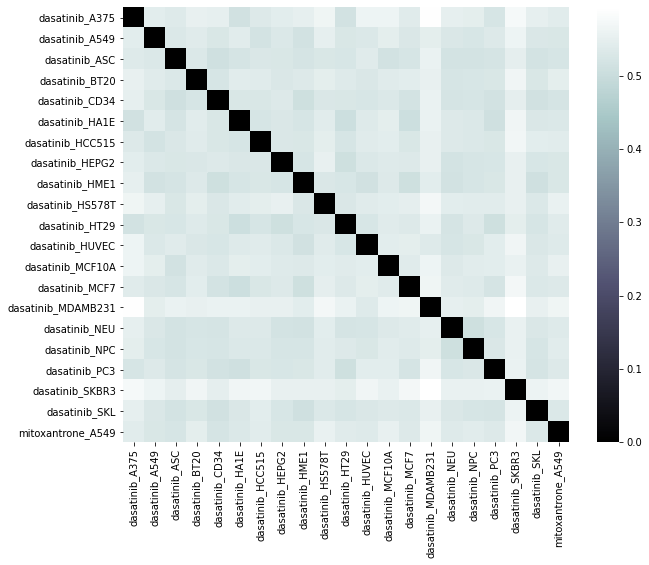

In [53]:
f = volta.plotting.plot_heatmap(mean_dist, xlabels=labels, ylabels = labels)

# Structural Similarity

In this example,we compute network distances based on graph structural properties

The volta.get_network_structural_vector.estimate_vector is a wrapper function that computes a vector based distance  on a few structural parameters implemented. This means that for each network a vector of parameters is estimated, such as network density, clustering and its diameter. The distance between the networks is then estimated based on the calculated individual vectors.

You can create your own vector by creating your own wrapper function, or call the corresponding functions. Please refer to the documentation for further information.
The vector used in this examples will contain data about the number of nodes & edges, network density, amount of missing edges, cycles, shortest path distributions, clustering coefficient, degree centrality/ closeness centrality and betweenness centrality distribution.

Note: The function requires a list of NetworkX graph objects as input. Some paramters can be expensive on large networks. Therefore it is advised to adjust the parameter selection based on your needs.



In [54]:
vectors = volta.get_network_structural_vector.estimate_vector(networks_graphs, edge_attribute="weight", is_file=False)

global
density
clustering
graph edges
cycles
shortest path distribution
cc
degree dist
cc dist
betweenness dist
[3, 5, 977, 27178, 0.057003708240347666, 0.2998863999247079, 94.29962917596524, 5.700370824034766, 26202, 10.532478436760552, 4.0, 13.489717441647295, 2.5212934335867727, 7.259801693282952, 2.445170340555394, 2, 0.6238810909685747, -0.4211466958834727, -0.26898459581900225, 0.2998863999247079, 0.05700370824034767, 0.0389344262295082, 0.04685484071603595, 1.3864222360817198, 1.4393455828385804, 0.4118315256463412, 0.41042893187552565, 0.03667696943617349, 0.09715242732008815, -0.3039144454349909, 0.0014847955261902271, 0.0010947866803283452, 0.001368683594033157, 2.8230806977653415, 14.956279375808606]
global
density
clustering
graph edges
cycles
shortest path distribution
cc
degree dist
cc dist
betweenness dist
[4, 5, 977, 10820, 0.02269409534036948, 0.19843699490692504, 97.73059046596305, 2.269409534036948, 9844, 19.361844778545308, 9.0, 22.125984501839454, 1.708752466489310

density
clustering
graph edges
cycles
shortest path distribution
cc
degree dist
cc dist
betweenness dist
[6, 10, 977, 13942, 0.02924224373710086, 0.7716281236687683, 97.07577562628991, 2.924224373710086, 12966, 4.967684713867037, 3.0, 8.824506859794402, 5.4948240555601515, 32.62827882492736, 4.625843740734959, 5, 1.426319520218655, -0.4312687792873558, 0.08060376047859119, 0.7716281236687683, 0.02924224373710086, 0.02766393442622951, 0.01689029095165531, 0.4373725203611963, -0.5549990725814804, 0.21741980010076795, 0.22161671207992734, 0.01683327364880505, -1.2224874220640314, 1.801543573626157, 0.0037236752151093475, 0.0018061645874422202, 0.005224488389944187, 3.525910869892303, 21.856723732810526]
global
density
clustering
graph edges
cycles
shortest path distribution
cc
degree dist
cc dist
betweenness dist
[4, 6, 977, 13102, 0.027480410087756094, 0.23978854197049917, 97.25195899122438, 2.7480410087756093, 12126, 17.619000494804553, 7.0, 23.453562422191403, 2.276322263009851, 5.1550

Based on these vectors a distance matrix between the networks can be estimated.

volta.get_network_structural_vector.matrix_from_vector is a wrapper function which estimates the euclidean, canberra, correlation, cosine and jaccard distance based on the vectors.Here distance metrics that are not in a [0,1] range, have been normalized.

In [55]:
euclidean, canberra, correlation, cosine, jaccard = volta.get_network_structural_vector.matrix_from_vector(vectors, normalize=True)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 

In [56]:
#Optional: merge the individual distances into a single distance matrix

mean_dist = volta.clustering.create_mean_distance_matrix([jaccard, euclidean, canberra, cosine], set_diagonal = True)

In [57]:
mean_dist_structural = mean_dist.copy()

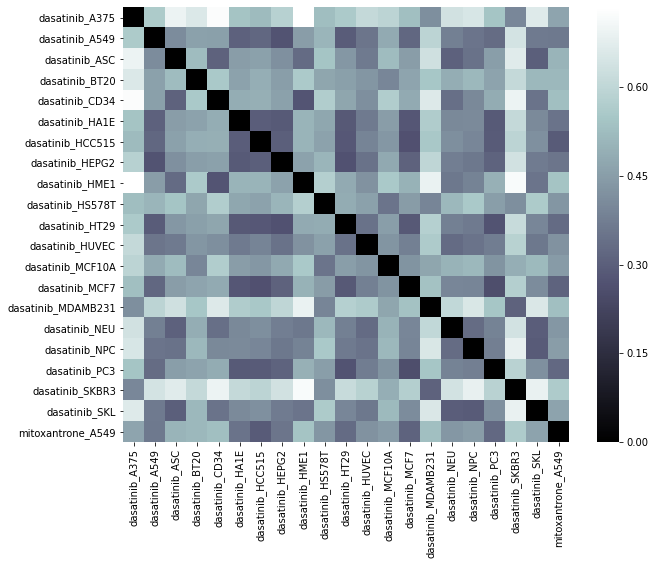

In [59]:
f = volta.plotting.plot_heatmap(mean_dist, xlabels=labels, ylabels = labels)

# Random Walks

In this example, we will use the Random walks method to characterize the structural/connectivity similarities around a specific node in different networks. In this example we will answer to the question: "Are the same nodes also similarly connected?"

The volta.get_walk_distances.helper_walks function performs random walks based on different starting nodes. Later, walks between networks for the same starting node will be compared.

The here used networks have all the same nodes, so nodes can simply be set to the node object of one of the graphs.

E.g. nodes = networks_graphs[0].nodes()

If the networks have different nodes then you can select which nodes should be compared (e.g. the union of nodes or only their intersection). If a node does not exist in a network None is returned for that node.
To reduce computational power you can investigate only a subset of pre-selected nodes of interest.

The example below uses the union (all of the example networks have the same nodes).

In [60]:
nodes = []
for net in networks_graphs:
    for node in net.nodes():
        if node not in nodes:
            nodes.append(node)

For each node in each network, 2* node degree times walks of size 3 are performed. The parameters can be adjusted as needed. 
Edges can be selected probabilisticly based on their attributes or can be viewed equally.


In [61]:
performed_walks = volta.get_walk_distances.helper_walks(networks_graphs, nodes, labels, steps=3, number_of_walks=2, degree=True, probabilistic=False, weight ="weight")

walks for node  0 outof 977
running walks 70 for node 780
running walks 16 for node 780
running walks 24 for node 780
running walks 64 for node 780
running walks 28 for node 780
running walks 22 for node 780
running walks 22 for node 780
running walks 20 for node 780
running walks 16 for node 780
running walks 210 for node 780
running walks 42 for node 780
running walks 14 for node 780
running walks 22 for node 780
running walks 16 for node 780
running walks 158 for node 780
running walks 8 for node 780
running walks 36 for node 780
running walks 34 for node 780
running walks 298 for node 780
running walks 38 for node 780
running walks 54 for node 780
running walks 134 for node 3895
running walks 40 for node 3895
running walks 32 for node 3895
running walks 66 for node 3895
running walks 20 for node 3895
running walks 78 for node 3895
running walks 56 for node 3895
running walks 128 for node 3895
running walks 22 for node 3895
running walks 94 for node 3895
running walks 104 for node 3

running walks 36 for node 9267
running walks 34 for node 9267
running walks 10 for node 9267
running walks 10 for node 9267
running walks 20 for node 9267
running walks 56 for node 9267
running walks 20 for node 9267
running walks 52 for node 9267
running walks 60 for node 9267
running walks 42 for node 9267
running walks 58 for node 9267
running walks 16 for node 9267
running walks 34 for node 9267
running walks 32 for node 9267
running walks 34 for node 9267
running walks 112 for node 5993
running walks 24 for node 5993
running walks 38 for node 5993
running walks 6 for node 5993
running walks 10 for node 5993
running walks 36 for node 5993
running walks 36 for node 5993
running walks 48 for node 5993
running walks 32 for node 5993
running walks 38 for node 5993
running walks 10 for node 5993
running walks 24 for node 5993
running walks 82 for node 5993
running walks 40 for node 5993
running walks 52 for node 5993
running walks 32 for node 5993
running walks 60 for node 5993
running 

running walks 28 for node 7849
running walks 46 for node 7849
running walks 34 for node 7849
running walks 60 for node 7849
running walks 32 for node 7849
running walks 34 for node 7849
running walks 108 for node 9552
running walks 128 for node 9552
running walks 32 for node 9552
running walks 76 for node 9552
running walks 24 for node 9552
running walks 68 for node 9552
running walks 48 for node 9552
running walks 32 for node 9552
running walks 26 for node 9552
running walks 50 for node 9552
running walks 60 for node 9552
running walks 18 for node 9552
running walks 78 for node 9552
running walks 72 for node 9552
running walks 158 for node 9552
running walks 24 for node 9552
running walks 30 for node 9552
running walks 96 for node 9552
running walks 130 for node 9552
running walks 78 for node 9552
running walks 100 for node 9552
running walks 82 for node 3032
running walks 22 for node 3032
running walks 18 for node 3032
running walks 76 for node 3032
running walks 36 for node 3032
run

running walks 12 for node 596
running walks 2 for node 596
running walks 6 for node 596
running walks 30 for node 596
running walks 14 for node 596
running walks 24 for node 596
running walks 14 for node 596
running walks 144 for node 596
running walks 30 for node 596
running walks 56 for node 596
running walks 118 for node 596
running walks 22 for node 596
running walks 96 for node 596
running walks 20 for node 596
running walks 24 for node 596
running walks 30 for node 596
running walks 88 for node 596
running walks 28 for node 596
running walks 92 for node 596
running walks 32 for node 10868
running walks 24 for node 10868
running walks 32 for node 10868
running walks 8 for node 10868
running walks 22 for node 10868
running walks 32 for node 10868
running walks 38 for node 10868
running walks 36 for node 10868
running walks 18 for node 10868
running walks 38 for node 10868
running walks 20 for node 10868
running walks 28 for node 10868
running walks 28 for node 10868
running walks 4

running walks 58 for node 10099
running walks 48 for node 10099
running walks 18 for node 10099
running walks 52 for node 10099
running walks 142 for node 10099
running walks 86 for node 10099
running walks 54 for node 10099
running walks 82 for node 10099
running walks 122 for node 10099
running walks 142 for node 10099
running walks 64 for node 10099
running walks 136 for node 10099
running walks 246 for node 4836
running walks 52 for node 4836
running walks 44 for node 4836
running walks 34 for node 4836
running walks 10 for node 4836
running walks 78 for node 4836
running walks 156 for node 4836
running walks 98 for node 4836
running walks 14 for node 4836
running walks 54 for node 4836
running walks 92 for node 4836
running walks 54 for node 4836
running walks 64 for node 4836
running walks 64 for node 4836
running walks 174 for node 4836
running walks 32 for node 4836
running walks 26 for node 4836
running walks 76 for node 4836
running walks 96 for node 4836
running walks 20 for

running walks 38 for node 10444
running walks 14 for node 10444
running walks 26 for node 10444
running walks 22 for node 10444
running walks 40 for node 10444
running walks 50 for node 10444
running walks 94 for node 10444
running walks 22 for node 10444
running walks 170 for node 10444
running walks 58 for node 10444
running walks 60 for node 10444
running walks 42 for node 10444
running walks 40 for node 10444
running walks 182 for node 10444
running walks 10 for node 10444
running walks 26 for node 10444
running walks 132 for node 10444
running walks 112 for node 10444
running walks 30 for node 10444
running walks 42 for node 10444
running walks 106 for node 11098
running walks 86 for node 11098
running walks 16 for node 11098
running walks 24 for node 11098
running walks 14 for node 11098
running walks 52 for node 11098
running walks 52 for node 11098
running walks 54 for node 11098
running walks 14 for node 11098
running walks 52 for node 11098
running walks 34 for node 11098
run

running walks 22 for node 6050
running walks 30 for node 6050
running walks 268 for node 2523
running walks 102 for node 2523
running walks 48 for node 2523
running walks 8 for node 2523
running walks 32 for node 2523
running walks 126 for node 2523
running walks 170 for node 2523
running walks 134 for node 2523
running walks 34 for node 2523
running walks 146 for node 2523
running walks 86 for node 2523
running walks 34 for node 2523
running walks 122 for node 2523
running walks 92 for node 2523
running walks 112 for node 2523
running walks 38 for node 2523
running walks 22 for node 2523
running walks 164 for node 2523
running walks 192 for node 2523
running walks 50 for node 2523
running walks 80 for node 2523
running walks 60 for node 50813
running walks 8 for node 50813
running walks 18 for node 50813
running walks 6 for node 50813
running walks 16 for node 50813
running walks 14 for node 50813
running walks 6 for node 50813
running walks 22 for node 50813
running walks 26 for node

running walks 98 for node 1154
running walks 30 for node 1154
running walks 62 for node 1154
running walks 98 for node 1154
running walks 12 for node 1154
running walks 34 for node 1154
running walks 44 for node 1154
running walks 68 for node 1154
running walks 192 for node 1154
running walks 12 for node 1154
running walks 114 for node 1154
running walks 26 for node 54915
running walks 58 for node 54915
running walks 38 for node 54915
running walks 30 for node 54915
running walks 10 for node 54915
running walks 34 for node 54915
running walks 8 for node 54915
running walks 34 for node 54915
running walks 8 for node 54915
running walks 30 for node 54915
running walks 12 for node 54915
running walks 22 for node 54915
running walks 26 for node 54915
running walks 30 for node 54915
running walks 26 for node 54915
running walks 28 for node 54915
running walks 26 for node 54915
running walks 10 for node 54915
running walks 258 for node 54915
running walks 26 for node 54915
running walks 38 f

running walks 140 for node 3930
running walks 178 for node 3930
running walks 62 for node 3930
running walks 120 for node 3930
running walks 84 for node 3930
running walks 46 for node 3930
running walks 56 for node 3930
running walks 38 for node 3930
running walks 160 for node 3930
running walks 240 for node 3930
running walks 40 for node 3930
running walks 116 for node 3930
running walks 138 for node 3988
running walks 90 for node 3988
running walks 16 for node 3988
running walks 76 for node 3988
running walks 16 for node 3988
running walks 10 for node 3988
running walks 24 for node 3988
running walks 34 for node 3988
running walks 16 for node 3988
running walks 162 for node 3988
running walks 32 for node 3988
running walks 48 for node 3988
running walks 116 for node 3988
running walks 16 for node 3988
running walks 90 for node 3988
running walks 24 for node 3988
running walks 26 for node 3988
running walks 66 for node 3988
running walks 120 for node 3988
running walks 24 for node 398

running walks 82 for node 6722
running walks 398 for node 10237
running walks 50 for node 10237
running walks 34 for node 10237
running walks 12 for node 10237
running walks 24 for node 10237
running walks 126 for node 10237
running walks 86 for node 10237
running walks 122 for node 10237
running walks 10 for node 10237
running walks 14 for node 10237
running walks 78 for node 10237
running walks 56 for node 10237
running walks 14 for node 10237
running walks 86 for node 10237
running walks 192 for node 10237
running walks 6 for node 10237
running walks 24 for node 10237
running walks 12 for node 10237
running walks 102 for node 10237
running walks 12 for node 10237
running walks 180 for node 10237
running walks 200 for node 2817
running walks 136 for node 2817
running walks 30 for node 2817
running walks 102 for node 2817
running walks 16 for node 2817
running walks 32 for node 2817
running walks 198 for node 2817
running walks 64 for node 2817
running walks 16 for node 2817
running w

running walks 92 for node 79724
running walks 14 for node 79724
running walks 102 for node 79724
running walks 28 for node 79724
running walks 36 for node 79724
running walks 54 for node 79724
running walks 34 for node 79724
running walks 32 for node 79724
running walks 34 for node 79724
running walks 102 for node 79724
running walks 36 for node 79724
running walks 80 for node 79724
running walks 42 for node 79724
running walks 48 for node 79724
running walks 18 for node 79724
running walks 22 for node 79724
running walks 58 for node 79724
running walks 260 for node 79724
running walks 16 for node 79724
running walks 68 for node 79724
running walks 86 for node 23523
running walks 74 for node 23523
running walks 26 for node 23523
running walks 76 for node 23523
running walks 4 for node 23523
running walks 52 for node 23523
running walks 22 for node 23523
running walks 36 for node 23523
running walks 18 for node 23523
running walks 64 for node 23523
running walks 32 for node 23523
runnin

running walks 18 for node 9787
running walks 12 for node 9787
running walks 20 for node 9787
running walks 88 for node 9787
running walks 86 for node 9787
running walks 28 for node 9787
running walks 10 for node 9787
running walks 92 for node 9787
running walks 20 for node 9787
running walks 40 for node 9787
running walks 18 for node 9787
running walks 30 for node 9787
running walks 30 for node 9787
running walks 24 for node 9787
running walks 36 for node 9787
running walks 90 for node 9787
running walks 36 for node 9787
running walks 18 for node 9787
running walks 34 for node 9787
running walks 98 for node 10681
running walks 120 for node 10681
running walks 20 for node 10681
running walks 82 for node 10681
running walks 14 for node 10681
running walks 32 for node 10681
running walks 14 for node 10681
running walks 56 for node 10681
running walks 18 for node 10681
running walks 24 for node 10681
running walks 48 for node 10681
running walks 20 for node 10681
running walks 62 for node 

running walks 68 for node 55148
running walks 16 for node 55148
running walks 60 for node 55148
running walks 24 for node 55148
running walks 22 for node 55148
running walks 70 for node 55148
running walks 42 for node 55148
running walks 44 for node 55148
running walks 44 for node 55148
running walks 56 for node 55148
running walks 18 for node 55148
running walks 20 for node 55148
running walks 60 for node 64080
running walks 44 for node 64080
running walks 6 for node 64080
running walks 80 for node 64080
running walks 28 for node 64080
running walks 22 for node 64080
running walks 18 for node 64080
running walks 28 for node 64080
running walks 4 for node 64080
running walks 58 for node 64080
running walks 22 for node 64080
running walks 34 for node 64080
running walks 84 for node 64080
running walks 66 for node 64080
running walks 12 for node 64080
running walks 24 for node 64080
running walks 34 for node 64080
running walks 22 for node 64080
running walks 90 for node 64080
running wa

running walks 54 for node 9375
running walks 44 for node 9375
running walks 22 for node 9375
running walks 128 for node 9375
running walks 48 for node 9375
running walks 32 for node 9375
running walks 66 for node 9375
running walks 46 for node 9375
running walks 38 for node 9375
running walks 20 for node 9375
running walks 14 for node 9375
running walks 202 for node 9375
running walks 36 for node 9375
running walks 64 for node 9375
running walks 56 for node 9375
running walks 62 for node 9375
running walks 26 for node 9375
running walks 100 for node 9375
running walks 130 for node 4043
running walks 54 for node 4043
running walks 26 for node 4043
running walks 78 for node 4043
running walks 24 for node 4043
running walks 144 for node 4043
running walks 142 for node 4043
running walks 94 for node 4043
running walks 26 for node 4043
running walks 36 for node 4043
running walks 72 for node 4043
running walks 128 for node 4043
running walks 144 for node 4043
running walks 124 for node 4043

running walks 76 for node 6603
running walks 292 for node 6603
running walks 24 for node 6603
running walks 42 for node 6603
running walks 240 for node 10276
running walks 68 for node 10276
running walks 32 for node 10276
running walks 102 for node 10276
running walks 22 for node 10276
running walks 64 for node 10276
running walks 78 for node 10276
running walks 68 for node 10276
running walks 14 for node 10276
running walks 96 for node 10276
running walks 48 for node 10276
running walks 22 for node 10276
running walks 86 for node 10276
running walks 168 for node 10276
running walks 58 for node 10276
running walks 18 for node 10276
running walks 40 for node 10276
running walks 20 for node 10276
running walks 302 for node 10276
running walks 28 for node 10276
running walks 22 for node 10276
running walks 234 for node 9019
running walks 32 for node 9019
running walks 32 for node 9019
running walks 104 for node 9019
running walks 24 for node 9019
running walks 124 for node 9019
running wa

running walks 14 for node 30836
running walks 20 for node 30836
running walks 32 for node 30836
running walks 24 for node 30836
running walks 74 for node 30836
running walks 108 for node 30836
running walks 38 for node 30836
running walks 2 for node 30836
running walks 52 for node 30836
running walks 156 for node 30836
running walks 88 for node 30836
running walks 48 for node 30836
running walks 120 for node 30836
running walks 148 for node 30836
running walks 24 for node 30836
running walks 14 for node 30836
running walks 22 for node 30836
running walks 116 for node 30836
running walks 26 for node 30836
running walks 80 for node 30836
running walks 264 for node 7750
running walks 16 for node 7750
running walks 18 for node 7750
running walks 28 for node 7750
running walks 20 for node 7750
running walks 50 for node 7750
running walks 28 for node 7750
running walks 36 for node 7750
running walks 22 for node 7750
running walks 18 for node 7750
running walks 36 for node 7750
running walks 

running walks 16 for node 9738
running walks 12 for node 9738
running walks 100 for node 9738
running walks 28 for node 9738
running walks 18 for node 9738
running walks 12 for node 9738
running walks 58 for node 9738
running walks 42 for node 9738
running walks 36 for node 9738
running walks 116 for node 9738
running walks 22 for node 9738
running walks 36 for node 9738
running walks 46 for node 9738
running walks 52 for node 9738
running walks 26 for node 9738
running walks 92 for node 9738
running walks 20 for node 9738
running walks 32 for node 9738
running walks 186 for node 5883
running walks 34 for node 5883
running walks 16 for node 5883
running walks 4 for node 5883
running walks 20 for node 5883
running walks 116 for node 5883
running walks 82 for node 5883
running walks 38 for node 5883
running walks 14 for node 5883
running walks 124 for node 5883
running walks 122 for node 5883
running walks 24 for node 5883
running walks 116 for node 5883
running walks 188 for node 5883
r

running walks 76 for node 51031
running walks 38 for node 51031
running walks 180 for node 51031
running walks 58 for node 51031
running walks 16 for node 51031
running walks 92 for node 51031
running walks 72 for node 51031
running walks 18 for node 51031
running walks 170 for node 51031
running walks 192 for node 8611
running walks 38 for node 8611
running walks 10 for node 8611
running walks 56 for node 8611
running walks 10 for node 8611
running walks 8 for node 8611
running walks 62 for node 8611
running walks 60 for node 8611
running walks 22 for node 8611
running walks 68 for node 8611
running walks 16 for node 8611
running walks 42 for node 8611
running walks 80 for node 8611
running walks 68 for node 8611
running walks 162 for node 8611
running walks 56 for node 8611
running walks 32 for node 8611
running walks 54 for node 8611
running walks 60 for node 8611
running walks 28 for node 8611
running walks 70 for node 8611
running walks 148 for node 23075
running walks 20 for node

running walks 18 for node 5986
running walks 170 for node 5986
running walks 36 for node 5986
running walks 204 for node 5986
running walks 4 for node 5986
running walks 26 for node 5986
running walks 164 for node 5986
running walks 36 for node 5986
running walks 12 for node 5986
running walks 90 for node 5986
running walks 114 for node 5986
running walks 20 for node 5986
running walks 50 for node 5986
running walks 126 for node 5986
running walks 90 for node 5986
running walks 14 for node 5986
running walks 30 for node 5986
running walks 278 for node 51460
running walks 34 for node 51460
running walks 14 for node 51460
running walks 20 for node 51460
running walks 16 for node 51460
running walks 66 for node 51460
running walks 50 for node 51460
running walks 64 for node 51460
running walks 8 for node 51460
running walks 102 for node 51460
running walks 38 for node 51460
running walks 22 for node 51460
running walks 22 for node 51460
running walks 88 for node 51460
running walks 68 for

running walks 30 for node 64077
running walks 172 for node 55278
running walks 58 for node 55278
running walks 20 for node 55278
running walks 112 for node 55278
running walks 8 for node 55278
running walks 132 for node 55278
running walks 60 for node 55278
running walks 30 for node 55278
running walks 16 for node 55278
running walks 12 for node 55278
running walks 126 for node 55278
running walks 24 for node 55278
running walks 32 for node 55278
running walks 94 for node 55278
running walks 4 for node 55278
running walks 18 for node 55278
running walks 38 for node 55278
running walks 184 for node 55278
running walks 88 for node 55278
running walks 42 for node 55278
running walks 66 for node 55278
running walks 206 for node 79170
running walks 126 for node 79170
running walks 46 for node 79170
running walks 14 for node 79170
running walks 20 for node 79170
running walks 154 for node 79170
running walks 88 for node 79170
running walks 92 for node 79170
running walks 6 for node 79170
run

running walks 26 for node 80347
running walks 104 for node 80347
running walks 112 for node 7082
running walks 48 for node 7082
running walks 30 for node 7082
running walks 48 for node 7082
running walks 16 for node 7082
running walks 14 for node 7082
running walks 26 for node 7082
running walks 76 for node 7082
running walks 22 for node 7082
running walks 134 for node 7082
running walks 16 for node 7082
running walks 42 for node 7082
running walks 82 for node 7082
running walks 46 for node 7082
running walks 188 for node 7082
running walks 32 for node 7082
running walks 32 for node 7082
running walks 20 for node 7082
running walks 62 for node 7082
running walks 34 for node 7082
running walks 58 for node 7082
running walks 110 for node 642
running walks 68 for node 642
running walks 16 for node 642
running walks 66 for node 642
running walks 18 for node 642
running walks 140 for node 642
running walks 50 for node 642
running walks 94 for node 642
running walks 22 for node 642
running w

running walks 34 for node 3551
running walks 18 for node 3551
running walks 102 for node 3551
running walks 26 for node 3551
running walks 26 for node 3551
running walks 82 for node 3551
running walks 68 for node 3551
running walks 12 for node 3551
running walks 4 for node 3551
running walks 52 for node 3551
running walks 60 for node 3551
running walks 72 for node 3551
running walks 110 for node 3551
running walks 102 for node 3551
running walks 26 for node 3551
running walks 28 for node 3551
running walks 40 for node 3551
running walks 64 for node 3551
running walks 38 for node 3551
running walks 142 for node 3551
running walks 100 for node 5873
running walks 58 for node 5873
running walks 26 for node 5873
running walks 14 for node 5873
running walks 6 for node 5873
running walks 8 for node 5873
running walks 42 for node 5873
running walks 102 for node 5873
running walks 12 for node 5873
running walks 62 for node 5873
running walks 44 for node 5873
running walks 26 for node 5873
runni

running walks 10 for node 3566
running walks 40 for node 3566
running walks 154 for node 3566
running walks 40 for node 3566
running walks 108 for node 3566
running walks 72 for node 3566
running walks 110 for node 3566
running walks 60 for node 3566
running walks 20 for node 3566
running walks 130 for node 3566
running walks 208 for node 3566
running walks 30 for node 3566
running walks 136 for node 3566
running walks 256 for node 10641
running walks 134 for node 10641
running walks 26 for node 10641
running walks 18 for node 10641
running walks 8 for node 10641
running walks 100 for node 10641
running walks 118 for node 10641
running walks 70 for node 10641
running walks 14 for node 10641
running walks 40 for node 10641
running walks 156 for node 10641
running walks 26 for node 10641
running walks 22 for node 10641
running walks 166 for node 10641
running walks 104 for node 10641
running walks 6 for node 10641
running walks 20 for node 10641
running walks 52 for node 10641
running wa

running walks 44 for node 388650
running walks 40 for node 388650
running walks 124 for node 388650
running walks 120 for node 388650
running walks 12 for node 388650
running walks 16 for node 388650
running walks 172 for node 388650
running walks 94 for node 388650
running walks 14 for node 388650
running walks 152 for node 388650
running walks 138 for node 51495
running walks 4 for node 51495
running walks 4 for node 51495
running walks 62 for node 51495
running walks 30 for node 51495
running walks 118 for node 51495
running walks 32 for node 51495
running walks 96 for node 51495
running walks 6 for node 51495
running walks 44 for node 51495
running walks 52 for node 51495
running walks 14 for node 51495
running walks 54 for node 51495
running walks 58 for node 51495
running walks 68 for node 51495
running walks 34 for node 51495
running walks 12 for node 51495
running walks 52 for node 51495
running walks 198 for node 51495
running walks 36 for node 51495
running walks 34 for node 

running walks 26 for node 8985
running walks 14 for node 8985
running walks 48 for node 8985
running walks 22 for node 8985
running walks 60 for node 8985
running walks 120 for node 8985
running walks 36 for node 8985
running walks 36 for node 8985
running walks 38 for node 8985
running walks 30 for node 8985
running walks 42 for node 8985
running walks 252 for node 8985
running walks 4 for node 8985
running walks 38 for node 8985
running walks 66 for node 1445
running walks 112 for node 1445
running walks 36 for node 1445
running walks 62 for node 1445
running walks 22 for node 1445
running walks 40 for node 1445
running walks 40 for node 1445
running walks 44 for node 1445
running walks 22 for node 1445
running walks 138 for node 1445
running walks 52 for node 1445
running walks 34 for node 1445
running walks 18 for node 1445
running walks 38 for node 1445
running walks 166 for node 1445
running walks 30 for node 1445
running walks 34 for node 1445
running walks 78 for node 1445
runn

running walks 8 for node 54438
running walks 90 for node 54438
running walks 88 for node 2767
running walks 38 for node 2767
running walks 28 for node 2767
running walks 76 for node 2767
running walks 28 for node 2767
running walks 24 for node 2767
running walks 58 for node 2767
running walks 36 for node 2767
running walks 12 for node 2767
running walks 10 for node 2767
running walks 26 for node 2767
running walks 32 for node 2767
running walks 6 for node 2767
running walks 6 for node 2767
running walks 46 for node 2767
running walks 16 for node 2767
running walks 24 for node 2767
running walks 48 for node 2767
running walks 84 for node 2767
running walks 40 for node 2767
running walks 34 for node 2767
running walks 146 for node 8243
running walks 22 for node 8243
running walks 12 for node 8243
running walks 32 for node 8243
running walks 12 for node 8243
running walks 94 for node 8243
running walks 78 for node 8243
running walks 72 for node 8243
running walks 8 for node 8243
running w

running walks 74 for node 6513
running walks 52 for node 6513
running walks 38 for node 6513
running walks 70 for node 6513
running walks 36 for node 6513
running walks 200 for node 6513
running walks 10 for node 6513
running walks 26 for node 6513
running walks 34 for node 6513
running walks 88 for node 6513
running walks 16 for node 6513
running walks 52 for node 6513
running walks 184 for node 7153
running walks 116 for node 7153
running walks 24 for node 7153
running walks 32 for node 7153
running walks 14 for node 7153
running walks 82 for node 7153
running walks 78 for node 7153
running walks 44 for node 7153
running walks 34 for node 7153
running walks 178 for node 7153
running walks 68 for node 7153
running walks 94 for node 7153
running walks 36 for node 7153
running walks 36 for node 7153
running walks 64 for node 7153
running walks 34 for node 7153
running walks 42 for node 7153
running walks 36 for node 7153
running walks 108 for node 7153
running walks 18 for node 7153
run

running walks 12 for node 2146
running walks 4 for node 2146
running walks 68 for node 2146
running walks 106 for node 2146
running walks 14 for node 2146
running walks 106 for node 2146
running walks 158 for node 22905
running walks 112 for node 22905
running walks 20 for node 22905
running walks 32 for node 22905
running walks 14 for node 22905
running walks 56 for node 22905
running walks 40 for node 22905
running walks 80 for node 22905
running walks 18 for node 22905
running walks 18 for node 22905
running walks 26 for node 22905
running walks 30 for node 22905
running walks 80 for node 22905
running walks 100 for node 22905
running walks 30 for node 22905
running walks 18 for node 22905
running walks 42 for node 22905
running walks 24 for node 22905
running walks 68 for node 22905
running walks 16 for node 22905
running walks 166 for node 22905
running walks 196 for node 4216
running walks 22 for node 4216
running walks 70 for node 4216
running walks 100 for node 4216
running wal

running walks 58 for node 11151
running walks 30 for node 11151
running walks 6 for node 11151
running walks 104 for node 11151
running walks 138 for node 11151
running walks 14 for node 11151
running walks 18 for node 11151
running walks 186 for node 11151
running walks 252 for node 11151
running walks 22 for node 11151
running walks 118 for node 11151
running walks 220 for node 11168
running walks 106 for node 11168
running walks 30 for node 11168
running walks 76 for node 11168
running walks 12 for node 11168
running walks 30 for node 11168
running walks 54 for node 11168
running walks 44 for node 11168
running walks 6 for node 11168
running walks 148 for node 11168
running walks 68 for node 11168
running walks 24 for node 11168
running walks 62 for node 11168
running walks 10 for node 11168
running walks 62 for node 11168
running walks 10 for node 11168
running walks 24 for node 11168
running walks 28 for node 11168
running walks 62 for node 11168
running walks 24 for node 11168
ru

running walks 42 for node 57761
running walks 16 for node 57761
running walks 38 for node 57761
running walks 14 for node 57761
running walks 36 for node 57761
running walks 64 for node 57761
running walks 104 for node 51015
running walks 36 for node 51015
running walks 26 for node 51015
running walks 8 for node 51015
running walks 20 for node 51015
running walks 40 for node 51015
running walks 46 for node 51015
running walks 36 for node 51015
running walks 28 for node 51015
running walks 58 for node 51015
running walks 22 for node 51015
running walks 46 for node 51015
running walks 60 for node 51015
running walks 58 for node 51015
running walks 122 for node 51015
running walks 46 for node 51015
running walks 22 for node 51015
running walks 32 for node 51015
running walks 106 for node 51015
running walks 30 for node 51015
running walks 28 for node 51015
running walks 114 for node 79174
running walks 54 for node 79174
running walks 22 for node 79174
running walks 22 for node 79174
runni

running walks 16 for node 7866
running walks 10 for node 7866
running walks 52 for node 7866
running walks 64 for node 7866
running walks 32 for node 7866
running walks 6 for node 7866
running walks 36 for node 9289
running walks 18 for node 9289
running walks 26 for node 9289
running walks 76 for node 9289
running walks 18 for node 9289
running walks 128 for node 9289
running walks 84 for node 9289
running walks 70 for node 9289
running walks 18 for node 9289
running walks 34 for node 9289
running walks 26 for node 9289
running walks 22 for node 9289
running walks 76 for node 9289
running walks 6 for node 9289
running walks 128 for node 9289
running walks 30 for node 9289
running walks 30 for node 9289
running walks 84 for node 9289
running walks 44 for node 9289
running walks 30 for node 9289
running walks 96 for node 9289
running walks 64 for node 23244
running walks 72 for node 23244
running walks 32 for node 23244
running walks 2 for node 23244
running walks 36 for node 23244
runn

running walks 34 for node 55604
running walks 24 for node 55604
running walks 56 for node 55604
running walks 66 for node 55604
running walks 2 for node 55604
running walks 38 for node 55604
running walks 10 for node 55604
running walks 32 for node 55604
running walks 90 for node 55604
running walks 26 for node 55604
running walks 48 for node 55604
running walks 228 for node 8396
running walks 38 for node 8396
running walks 10 for node 8396
running walks 80 for node 8396
running walks 32 for node 8396
running walks 104 for node 8396
running walks 116 for node 8396
running walks 62 for node 8396
running walks 16 for node 8396
running walks 72 for node 8396
running walks 78 for node 8396
running walks 70 for node 8396
running walks 126 for node 8396
running walks 72 for node 8396
running walks 70 for node 8396
running walks 30 for node 8396
running walks 52 for node 8396
running walks 84 for node 8396
running walks 84 for node 8396
running walks 26 for node 8396
running walks 40 for node

running walks 50 for node 11073
running walks 34 for node 11073
running walks 58 for node 11073
running walks 110 for node 11073
running walks 32 for node 11073
running walks 156 for node 11073
running walks 66 for node 2961
running walks 36 for node 2961
running walks 42 for node 2961
running walks 76 for node 2961
running walks 14 for node 2961
running walks 16 for node 2961
running walks 20 for node 2961
running walks 50 for node 2961
running walks 10 for node 2961
running walks 36 for node 2961
running walks 18 for node 2961
running walks 26 for node 2961
running walks 20 for node 2961
running walks 2 for node 2961
running walks 118 for node 2961
running walks 18 for node 2961
running walks 28 for node 2961
running walks 50 for node 2961
running walks 74 for node 2961
running walks 30 for node 2961
running walks 60 for node 2961
running walks 28 for node 6845
running walks 28 for node 6845
running walks 12 for node 6845
running walks 102 for node 6845
running walks 20 for node 6845

running walks 98 for node 4088
running walks 10 for node 4088
running walks 74 for node 4088
running walks 90 for node 150094
running walks 20 for node 150094
running walks 16 for node 150094
running walks 26 for node 150094
running walks 16 for node 150094
running walks 50 for node 150094
running walks 76 for node 150094
running walks 16 for node 150094
running walks 14 for node 150094
running walks 18 for node 150094
running walks 14 for node 150094
running walks 38 for node 150094
running walks 20 for node 150094
running walks 98 for node 150094
running walks 108 for node 150094
running walks 14 for node 150094
running walks 28 for node 150094
running walks 18 for node 150094
running walks 120 for node 150094
running walks 12 for node 150094
running walks 94 for node 150094
running walks 70 for node 10892
running walks 38 for node 10892
running walks 10 for node 10892
running walks 64 for node 10892
running walks 24 for node 10892
running walks 72 for node 10892
running walks 26 for

running walks 18 for node 26020
running walks 52 for node 26020
running walks 166 for node 26020
running walks 34 for node 26020
running walks 140 for node 26020
running walks 124 for node 8508
running walks 92 for node 8508
running walks 20 for node 8508
running walks 80 for node 8508
running walks 22 for node 8508
running walks 58 for node 8508
running walks 72 for node 8508
running walks 70 for node 8508
running walks 8 for node 8508
running walks 172 for node 8508
running walks 56 for node 8508
running walks 42 for node 8508
running walks 60 for node 8508
running walks 62 for node 8508
running walks 138 for node 8508
running walks 8 for node 8508
running walks 24 for node 8508
running walks 206 for node 8508
running walks 76 for node 8508
running walks 34 for node 8508
running walks 60 for node 8508
running walks 44 for node 23530
running walks 42 for node 23530
running walks 36 for node 23530
running walks 74 for node 23530
running walks 24 for node 23530
running walks 26 for node

running walks 44 for node 51569
running walks 32 for node 51569
running walks 162 for node 10606
running walks 58 for node 10606
running walks 16 for node 10606
running walks 14 for node 10606
running walks 4 for node 10606
running walks 64 for node 10606
running walks 62 for node 10606
running walks 32 for node 10606
running walks 10 for node 10606
running walks 66 for node 10606
running walks 74 for node 10606
running walks 48 for node 10606
running walks 58 for node 10606
running walks 54 for node 10606
running walks 138 for node 10606
running walks 22 for node 10606
running walks 16 for node 10606
running walks 182 for node 10606
running walks 74 for node 10606
running walks 46 for node 10606
running walks 78 for node 10606
running walks 86 for node 3693
running walks 80 for node 3693
running walks 42 for node 3693
running walks 38 for node 3693
running walks 12 for node 3693
running walks 62 for node 3693
running walks 74 for node 3693
running walks 52 for node 3693
running walks 

running walks 20 for node 23670
running walks 108 for node 23670
running walks 148 for node 56997
running walks 4 for node 56997
running walks 2 for node 56997
running walks 20 for node 56997
running walks 22 for node 56997
running walks 74 for node 56997
running walks 26 for node 56997
running walks 6 for node 56997
running walks 14 for node 56997
running walks 154 for node 56997
running walks 12 for node 56997
running walks 18 for node 56997
running walks 60 for node 56997
running walks 8 for node 56997
running walks 38 for node 56997
running walks 42 for node 56997
running walks 32 for node 56997
running walks 58 for node 56997
running walks 58 for node 56997
running walks 30 for node 56997
running walks 54 for node 56997
running walks 40 for node 51026
running walks 46 for node 51026
running walks 24 for node 51026
running walks 82 for node 51026
running walks 16 for node 51026
running walks 114 for node 51026
running walks 20 for node 51026
running walks 18 for node 51026
running 

running walks 102 for node 51599
running walks 6 for node 51599
running walks 12 for node 51599
running walks 8 for node 51599
running walks 22 for node 51599
running walks 40 for node 51599
running walks 26 for node 51599
running walks 22 for node 51599
running walks 50 for node 51599
running walks 22 for node 51599
running walks 24 for node 51599
running walks 76 for node 51599
running walks 20 for node 51599
running walks 138 for node 51599
running walks 8 for node 51599
running walks 10 for node 51599
running walks 2 for node 51599
running walks 262 for node 51599
running walks 22 for node 51599
running walks 52 for node 51599
running walks 74 for node 873
running walks 52 for node 873
running walks 14 for node 873
running walks 12 for node 873
running walks 8 for node 873
running walks 20 for node 873
running walks 26 for node 873
running walks 72 for node 873
running walks 14 for node 873
running walks 40 for node 873
running walks 16 for node 873
running walks 70 for node 873
ru

running walks 10 for node 2778
running walks 288 for node 2778
running walks 48 for node 2778
running walks 52 for node 2778
running walks 38 for node 4780
running walks 88 for node 4780
running walks 20 for node 4780
running walks 52 for node 4780
running walks 10 for node 4780
running walks 18 for node 4780
running walks 22 for node 4780
running walks 8 for node 4780
running walks 24 for node 4780
running walks 230 for node 4780
running walks 28 for node 4780
running walks 10 for node 4780
running walks 120 for node 4780
running walks 68 for node 4780
running walks 200 for node 4780
running walks 10 for node 4780
running walks 30 for node 4780
running walks 60 for node 4780
running walks 140 for node 4780
running walks 14 for node 4780
running walks 96 for node 4780
running walks 90 for node 7296
running walks 108 for node 7296
running walks 14 for node 7296
running walks 62 for node 7296
running walks 14 for node 7296
running walks 104 for node 7296
running walks 64 for node 7296
ru

running walks 22 for node 55111
running walks 52 for node 55111
running walks 80 for node 80758
running walks 10 for node 80758
running walks 16 for node 80758
running walks 48 for node 80758
running walks 6 for node 80758
running walks 30 for node 80758
running walks 12 for node 80758
running walks 80 for node 80758
running walks 12 for node 80758
running walks 2 for node 80758
running walks 60 for node 80758
running walks 24 for node 80758
running walks 84 for node 80758
running walks 6 for node 80758
running walks 22 for node 80758
running walks 32 for node 80758
running walks 14 for node 80758
running walks 14 for node 80758
running walks 50 for node 80758
running walks 34 for node 80758
running walks 56 for node 80758
running walks 42 for node 23300
running walks 26 for node 23300
running walks 34 for node 23300
running walks 102 for node 23300
running walks 14 for node 23300
running walks 64 for node 23300
running walks 90 for node 23300
running walks 62 for node 23300
running wa

running walks 60 for node 128
running walks 114 for node 128
running walks 18 for node 128
running walks 60 for node 128
running walks 60 for node 51170
running walks 32 for node 51170
running walks 16 for node 51170
running walks 82 for node 51170
running walks 16 for node 51170
running walks 12 for node 51170
running walks 56 for node 51170
running walks 40 for node 51170
running walks 8 for node 51170
running walks 80 for node 51170
running walks 66 for node 51170
running walks 54 for node 51170
running walks 10 for node 51170
running walks 26 for node 51170
running walks 26 for node 51170
running walks 24 for node 51170
running walks 20 for node 51170
running walks 56 for node 51170
running walks 74 for node 51170
running walks 10 for node 51170
running walks 34 for node 51170
running walks 60 for node 29763
running walks 110 for node 29763
running walks 20 for node 29763
running walks 8 for node 29763
running walks 12 for node 29763
running walks 22 for node 29763
running walks 54

running walks 18 for node 79850
running walks 30 for node 79850
running walks 46 for node 57787
running walks 48 for node 57787
running walks 18 for node 57787
running walks 26 for node 57787
running walks 10 for node 57787
running walks 22 for node 57787
running walks 32 for node 57787
running walks 62 for node 57787
running walks 22 for node 57787
running walks 78 for node 57787
running walks 40 for node 57787
running walks 56 for node 57787
running walks 46 for node 57787
running walks 38 for node 57787
running walks 26 for node 57787
running walks 24 for node 57787
running walks 22 for node 57787
running walks 102 for node 57787
running walks 48 for node 57787
running walks 6 for node 57787
running walks 26 for node 57787
running walks 72 for node 10972
running walks 32 for node 10972
running walks 22 for node 10972
running walks 34 for node 10972
running walks 36 for node 10972
running walks 14 for node 10972
running walks 52 for node 10972
running walks 70 for node 10972
running 

running walks 20 for node 23585
running walks 16 for node 23585
running walks 94 for node 23585
running walks 10 for node 23585
running walks 54 for node 23585
running walks 78 for node 29937
running walks 26 for node 29937
running walks 44 for node 29937
running walks 24 for node 29937
running walks 14 for node 29937
running walks 40 for node 29937
running walks 72 for node 29937
running walks 20 for node 29937
running walks 32 for node 29937
running walks 52 for node 29937
running walks 24 for node 29937
running walks 42 for node 29937
running walks 98 for node 29937
running walks 28 for node 29937
running walks 148 for node 29937
running walks 10 for node 29937
running walks 24 for node 29937
running walks 100 for node 29937
running walks 150 for node 29937
running walks 46 for node 29937
running walks 66 for node 29937
running walks 86 for node 54512
running walks 28 for node 54512
running walks 32 for node 54512
running walks 6 for node 54512
running walks 16 for node 54512
runnin

running walks 56 for node 11200
running walks 118 for node 11200
running walks 18 for node 11200
running walks 58 for node 11200
running walks 108 for node 11200
running walks 24 for node 11200
running walks 26 for node 11200
running walks 42 for node 11200
running walks 146 for node 11200
running walks 12 for node 11200
running walks 50 for node 11200
running walks 72 for node 11200
running walks 208 for node 11200
running walks 28 for node 11200
running walks 44 for node 11200
running walks 68 for node 9217
running walks 22 for node 9217
running walks 26 for node 9217
running walks 42 for node 9217
running walks 18 for node 9217
running walks 54 for node 9217
running walks 50 for node 9217
running walks 72 for node 9217
running walks 10 for node 9217
running walks 72 for node 9217
running walks 44 for node 9217
running walks 54 for node 9217
running walks 40 for node 9217
running walks 26 for node 9217
running walks 58 for node 9217
running walks 16 for node 9217
running walks 26 for

running walks 54 for node 8624
running walks 10 for node 8624
running walks 46 for node 8624
running walks 40 for node 2064
running walks 20 for node 2064
running walks 8 for node 2064
running walks 18 for node 2064
running walks 8 for node 2064
running walks 146 for node 2064
running walks 138 for node 2064
running walks 32 for node 2064
running walks 22 for node 2064
running walks 58 for node 2064
running walks 44 for node 2064
running walks 40 for node 2064
running walks 56 for node 2064
running walks 78 for node 2064
running walks 32 for node 2064
running walks 26 for node 2064
running walks 24 for node 2064
running walks 44 for node 2064
running walks 4 for node 2064
running walks 22 for node 2064
running walks 52 for node 2064
running walks 34 for node 9710
running walks 34 for node 9710
running walks 14 for node 9710
running walks 82 for node 9710
running walks 20 for node 9710
running walks 20 for node 9710
running walks 12 for node 9710
running walks 30 for node 9710
running w

running walks 110 for node 1647
running walks 20 for node 1647
running walks 24 for node 1647
running walks 196 for node 1647
running walks 198 for node 1647
running walks 26 for node 1647
running walks 44 for node 1647
running walks 56 for node 81533
running walks 32 for node 81533
running walks 36 for node 81533
running walks 64 for node 81533
running walks 12 for node 81533
running walks 44 for node 81533
running walks 82 for node 81533
running walks 56 for node 81533
running walks 10 for node 81533
running walks 50 for node 81533
running walks 46 for node 81533
running walks 48 for node 81533
running walks 56 for node 81533
running walks 28 for node 81533
running walks 14 for node 81533
running walks 14 for node 81533
running walks 34 for node 81533
running walks 40 for node 81533
running walks 60 for node 81533
running walks 10 for node 81533
running walks 22 for node 81533
running walks 24 for node 102
running walks 44 for node 102
running walks 28 for node 102
running walks 30 f

running walks 14 for node 7486
running walks 134 for node 7486
running walks 34 for node 7486
running walks 32 for node 7486
running walks 32 for node 7486
running walks 108 for node 7486
running walks 20 for node 7486
running walks 24 for node 7486
running walks 52 for node 10668
running walks 86 for node 10668
running walks 12 for node 10668
running walks 28 for node 10668
running walks 8 for node 10668
running walks 22 for node 10668
running walks 28 for node 10668
running walks 14 for node 10668
running walks 12 for node 10668
running walks 84 for node 10668
running walks 32 for node 10668
running walks 26 for node 10668
running walks 30 for node 10668
running walks 26 for node 10668
running walks 162 for node 10668
running walks 22 for node 10668
running walks 24 for node 10668
running walks 106 for node 10668
running walks 30 for node 10668
running walks 18 for node 10668
running walks 16 for node 10668
running walks 28 for node 22809
running walks 28 for node 22809
running walks

running walks 12 for node 55608
running walks 42 for node 55608
running walks 24 for node 55608
running walks 40 for node 55608
running walks 78 for node 29083
running walks 64 for node 29083
running walks 26 for node 29083
running walks 76 for node 29083
running walks 18 for node 29083
running walks 2 for node 29083
running walks 18 for node 29083
running walks 14 for node 29083
running walks 18 for node 29083
running walks 20 for node 29083
running walks 6 for node 29083
running walks 48 for node 29083
running walks 78 for node 29083
running walks 116 for node 29083
running walks 30 for node 29083
running walks 24 for node 29083
running walks 20 for node 29083
running walks 4 for node 29083
running walks 16 for node 29083
running walks 18 for node 29083
running walks 76 for node 29083
running walks 46 for node 55862
running walks 24 for node 55862
running walks 16 for node 55862
running walks 102 for node 55862
running walks 10 for node 55862
running walks 32 for node 55862
running w

running walks 36 for node 11157
running walks 26 for node 11157
running walks 12 for node 11157
running walks 252 for node 11157
running walks 24 for node 11157
running walks 46 for node 11157
running walks 30 for node 7158
running walks 64 for node 7158
running walks 14 for node 7158
running walks 10 for node 7158
running walks 16 for node 7158
running walks 8 for node 7158
running walks 14 for node 7158
running walks 46 for node 7158
running walks 18 for node 7158
running walks 58 for node 7158
running walks 26 for node 7158
running walks 38 for node 7158
running walks 54 for node 7158
running walks 34 for node 7158
running walks 56 for node 7158
running walks 16 for node 7158
running walks 38 for node 7158
running walks 26 for node 7158
running walks 120 for node 7158
running walks 18 for node 7158
running walks 24 for node 7158
running walks 66 for node 51203
running walks 114 for node 51203
running walks 46 for node 51203
running walks 36 for node 51203
running walks 14 for node 5

running walks 38 for node 22934
running walks 20 for node 22934
running walks 24 for node 22934
running walks 8 for node 22934
running walks 28 for node 22934
running walks 22 for node 22934
running walks 14 for node 22934
running walks 74 for node 22934
running walks 36 for node 22934
running walks 36 for node 22934
running walks 20 for node 22934
running walks 98 for node 22934
running walks 148 for node 22934
running walks 50 for node 22934
running walks 52 for node 22934
running walks 44 for node 22934
running walks 66 for node 22934
running walks 20 for node 22934
running walks 36 for node 22934
running walks 24 for node 50865
running walks 30 for node 50865
running walks 12 for node 50865
running walks 28 for node 50865
running walks 14 for node 50865
running walks 18 for node 50865
running walks 84 for node 50865
running walks 32 for node 50865
running walks 20 for node 50865
running walks 48 for node 50865
running walks 48 for node 50865
running walks 14 for node 50865
running 

running walks 116 for node 5914
running walks 34 for node 5914
running walks 30 for node 5914
running walks 46 for node 5255
running walks 56 for node 5255
running walks 32 for node 5255
running walks 8 for node 5255
running walks 24 for node 5255
running walks 18 for node 5255
running walks 24 for node 5255
running walks 34 for node 5255
running walks 44 for node 5255
running walks 8 for node 5255
running walks 20 for node 5255
running walks 50 for node 5255
running walks 62 for node 5255
running walks 14 for node 5255
running walks 70 for node 5255
running walks 6 for node 5255
running walks 30 for node 5255
running walks 40 for node 5255
running walks 20 for node 5255
running walks 24 for node 5255
running walks 30 for node 5255
running walks 28 for node 55793
running walks 28 for node 55793
running walks 10 for node 55793
running walks 80 for node 55793
running walks 14 for node 55793
running walks 48 for node 55793
running walks 26 for node 55793
running walks 34 for node 55793
ru

running walks 24 for node 5889
running walks 26 for node 5889
running walks 34 for node 5889
running walks 30 for node 5889
running walks 62 for node 5889
running walks 28 for node 29994
running walks 12 for node 29994
running walks 46 for node 29994
running walks 20 for node 29994
running walks 36 for node 29994
running walks 14 for node 29994
running walks 46 for node 29994
running walks 14 for node 29994
running walks 16 for node 29994
running walks 94 for node 29994
running walks 30 for node 29994
running walks 30 for node 29994
running walks 58 for node 29994
running walks 24 for node 29994
running walks 180 for node 29994
running walks 54 for node 29994
running walks 32 for node 29994
running walks 22 for node 29994
running walks 40 for node 29994
running walks 26 for node 29994
running walks 14 for node 29994
running walks 16 for node 57215
running walks 20 for node 57215
running walks 12 for node 57215
running walks 28 for node 57215
running walks 6 for node 57215
running walks

running walks 10 for node 7485
running walks 80 for node 7485
running walks 12 for node 7485
running walks 14 for node 7485
running walks 22 for node 7485
running walks 24 for node 7485
running walks 6 for node 7485
running walks 50 for node 7485
running walks 50 for node 7485
running walks 32 for node 7485
running walks 28 for node 7485
running walks 18 for node 7485
running walks 180 for node 7485
running walks 50 for node 7485
running walks 22 for node 7485
running walks 16 for node 7485
running walks 202 for node 7485
running walks 30 for node 7485
running walks 12 for node 7485
running walks 28 for node 1662
running walks 42 for node 1662
running walks 22 for node 1662
running walks 84 for node 1662
running walks 4 for node 1662
running walks 8 for node 1662
running walks 46 for node 1662
running walks 100 for node 1662
running walks 10 for node 1662
running walks 12 for node 1662
running walks 24 for node 1662
running walks 24 for node 1662
running walks 46 for node 1662
running 

running walks 16 for node 10057
running walks 4 for node 10057
running walks 70 for node 10057
running walks 16 for node 10057
running walks 116 for node 10057
running walks 122 for node 10057
running walks 78 for node 10057
running walks 142 for node 10057
running walks 26 for node 10057
running walks 18 for node 10057
running walks 12 for node 10057
running walks 66 for node 10057
running walks 2 for node 10057
running walks 26 for node 10057


Now we are estimating for each starting node how often surrounding nodes/ edges have been visit with respect to all the visited nodes/ edges. 
Note: Depending on your network sizes and selected nodes this can be quite memory intensive.

In [62]:
node_counts, edge_counts, nodes_frc, edges_frc = volta.get_walk_distances.helper_get_counts(labels, networks_graphs, performed_walks)

Now we want to estimate network similarities based on the visited nodes. For each network pair, kendall rank correlation is calculated (of the top 50 nodes)  for the same starting node. The mean correlation value of all same node pairs for a network pair is estimated and returned.

In [63]:
results_edges, results_nodes, results_edges_p, results_nodes_p = volta.get_walk_distances.helper_walk_sim(networks_graphs, performed_walks, nodes, labels, top=50, undirected=False, return_all = False, nodes_ranked=nodes_frc, edges_ranked=edges_frc)

Optional:The correlations can be converted into a distance (as required by the clustering algorithms). Here the transformation of distance d = (1-c)/2 for a centrality score c is used.

In [64]:
cor_nodes = results_nodes.copy()

for index, x in np.ndenumerate(cor_nodes):
    d = (1-x)/2
    
    cor_nodes[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        cor_nodes[index[0]][index[1]] = 0

In [65]:
cor_edges = results_edges.copy()

for index, x in np.ndenumerate(cor_edges):
    d = (1-x)/2
    
    cor_edges[index[0]][index[1]] = d
    
    if index[0] == index[1]:
        cor_edges[index[0]][index[1]] = 0

In [66]:
mean_dist = volta.clustering.create_mean_distance_matrix([cor_nodes, cor_edges], set_diagonal = True)

In [67]:
mean_dist_walks = mean_dist.copy()

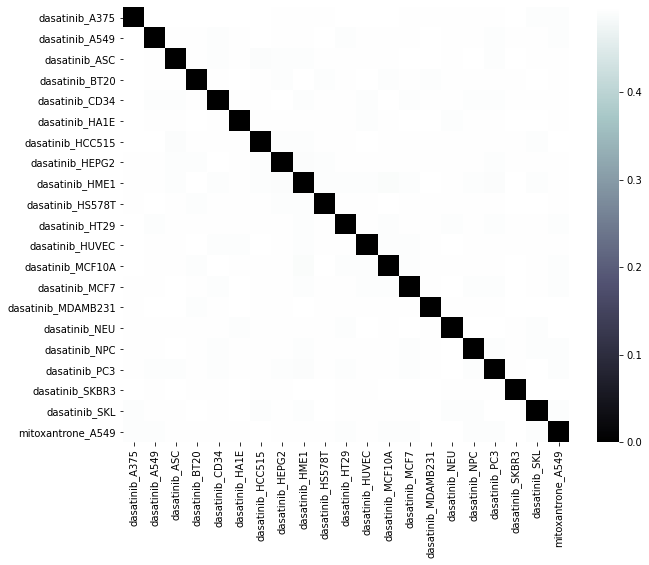

In [68]:
f = volta.plotting.plot_heatmap(mean_dist, xlabels=labels, ylabels = labels)

# Clustering

On each of the three median distance matrices calculated in the previous section clustering algorithms are run (the algorithms can also be run on the individual distance matrices if wished).
Here we use three different algorithms, but any algorithms more suited to your type of analysis can be applied. Please refer to the documentation for available algorithms.

Based on the three individual clusterings, a consensus clustering is created.
Each clustering algorithm is tuned based on a individually modifiable multiobjective function.

In [69]:
distances = [mean_dist_nodes, mean_dist_edges, mean_dist_structural, mean_dist_walks]
distances_name = ["nodes", "edges", "structural", "walks"]

In [70]:
clusterings = {}

for n in distances_name:
    clusterings[n] = []

Hierarchical clustering is run and best k value is estimated based on a multiobjective function, which focuses on maximizing the distance between clusters, minimizing distance within a cluster as well as having an even cluster size distribution
For the best k value the algorithm is run 10 times. One of the selected 3 algorithms has some randomness. In order to not bias towards one algorithm all are run the same amount of time. 

In [71]:
t = []
for i in range(2,len(labels)):
    t.append(i)
    
hierarchical = {}
for d in range(len(distances)):
    dist = distances[d]
    n = distances_name[d]
    maxs = 10000

    for i, k in enumerate(t):
    #for i, k in enumerate([2, 3]):




        cl_labels = volta.clustering.hierarchical_clustering(dist, n_clusters=k, linkage="complete")


        #print("obj 1")
        avg_score = volta.clustering.multiobjective(dist, cl_labels, min_number_clusters=None, max_number_clusters=None, min_cluster_size = None, max_cluster_size=None, local =True, bet=False, e=None, s=None, cluster_size_distribution = True)



        if avg_score < maxs:
            maxs = avg_score
            mk = k





    hierarchical[n] = k
    print(maxs, mk)
    
    print("creating clusterings for", n, "with k ", mk)
    
    for xx in range(10):
    
    
        cl_labels = volta.clustering.hierarchical_clustering(dist, n_clusters=mk, linkage="complete")
        clusterings.setdefault(n, []).append(cl_labels)



1.4862885762333302 6
creating clusterings for nodes with k  6
1.682868017188277 6
creating clusterings for edges with k  6
1.3562560938217976 4
creating clusterings for structural with k  4
1.4925037959230094 6
creating clusterings for walks with k  6


Affinity propagation has no parameters to be set so does not need to be tuned, but it is also run ten times (or 10x the same clustering is appended) so that for the later consensus for each clustering algorithm the same number of clusterings are provided. 

In [72]:
for d in range(len(distances)):
    dist = distances[d]
    n = distances_name[d]
    
    for xx in range(10):
        cl_labels = volta.clustering.affinityPropagation_clustering(dist)
        clusterings.setdefault(n, []).append(cl_labels)

K Mediods is tuned on the same multiobjective function and for the best k the algorithm is run three times.

In [73]:
t = []
for i in range(2,len(labels)):
    t.append(i)
    
kmed = {}
for d in range(len(distances)):
    dist = distances[d]
    n = distances_name[d]
    maxs = 10000

    for i, k in enumerate(t):
    #for i, k in enumerate([2, 3]):




        cl_labels, mediods = volta.clustering.kmedoids_clustering(dist, n_clusters=k)


        #print("obj 1")
        avg_score = volta.clustering.multiobjective(dist, cl_labels, min_number_clusters=None, max_number_clusters=None, min_cluster_size = None, max_cluster_size=None, local =True, bet=False, e=None, s=None, cluster_size_distribution = True)



        if avg_score < maxs:
            maxs = avg_score
            mk = k





    kmed[n] = k
    print(maxs, mk)
    
    print("creating clusterings for", n, "with k ", mk)
    
    for xx in range(10):
    
    
        cl_labels, mediods = volta.clustering.kmedoids_clustering(dist, n_clusters=mk)
        clusterings.setdefault(n, []).append(np.array(cl_labels))



1.4855243093092734 7
creating clusterings for nodes with k  7
1.5345586379216904 2
creating clusterings for edges with k  2
1.368433456549408 3
creating clusterings for structural with k  3
1.4934346693085774 5
creating clusterings for walks with k  5


For each of the groups we create an individual consensus clustering in order to compare this later to the combined consensus clustering. 


#### Nodes

In [105]:
merged_clusterings = []


for c in clusterings["nodes"]:
        
        merged_clusterings.append(c.tolist())

In [106]:
consensus_nodes = volta.clustering.consensus_clustering(merged_clusterings, seed=1234, threshold="matrix", per_node=False, rep = 10)

matrix
rerun


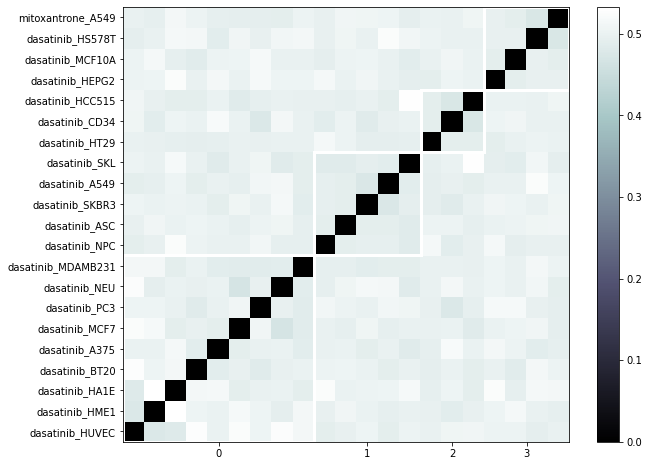

In [107]:
fig = volta.plotting.plot_clustering_heatmap(consensus_nodes, mean_dist_nodes, labels, cmap="bone")

#### Edges

In [108]:
merged_clusterings = []


for c in clusterings["edges"]:
        
        merged_clusterings.append(c.tolist())

In [109]:
consensus_edges = volta.clustering.consensus_clustering(merged_clusterings, seed=1234, threshold="matrix", per_node=False, rep = 10)

matrix
rerun


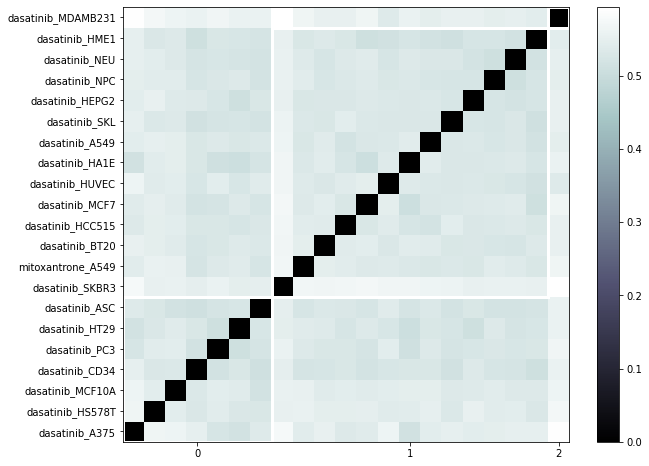

In [110]:
fig = volta.plotting.plot_clustering_heatmap(consensus_edges, mean_dist_edges, labels, cmap="bone")

#### Structural



In [111]:
merged_clusterings = []


for c in clusterings["structural"]:
        
        merged_clusterings.append(c.tolist())

In [112]:
consensus_structural = volta.clustering.consensus_clustering(merged_clusterings, seed=1234, threshold="matrix", per_node=False, rep = 10)

matrix


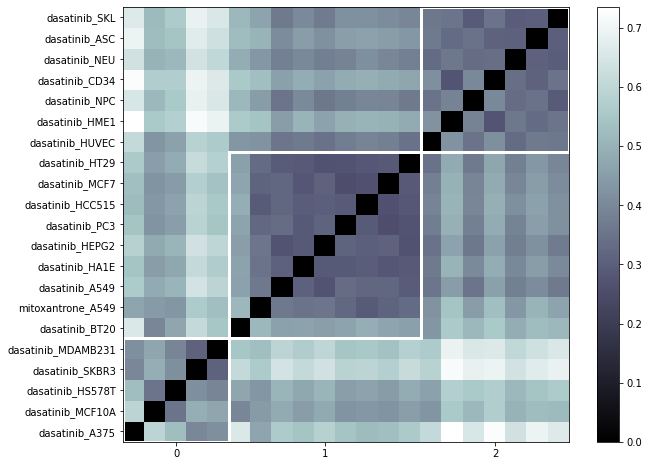

In [113]:
fig = volta.plotting.plot_clustering_heatmap(consensus_structural, mean_dist_structural, labels, cmap="bone")

#### Walks

In [114]:
merged_clusterings = []


for c in clusterings["walks"]:
        
        merged_clusterings.append(c.tolist())

In [115]:
consensus_walks = volta.clustering.consensus_clustering(merged_clusterings, seed=1234, threshold="matrix", per_node=False, rep = 10)

matrix


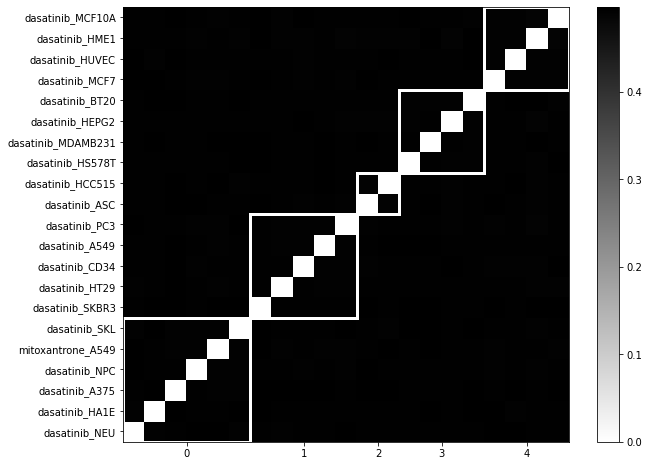

In [116]:
fig = volta.plotting.plot_clustering_heatmap(consensus_walks, mean_dist_walks, labels, cmap="binary")

We plot the agreement matrix, which shows for each pair in how many of the groups they have been clustered together.

In [139]:
consensus = [consensus_nodes, consensus_edges, consensus_structural, consensus_walks]

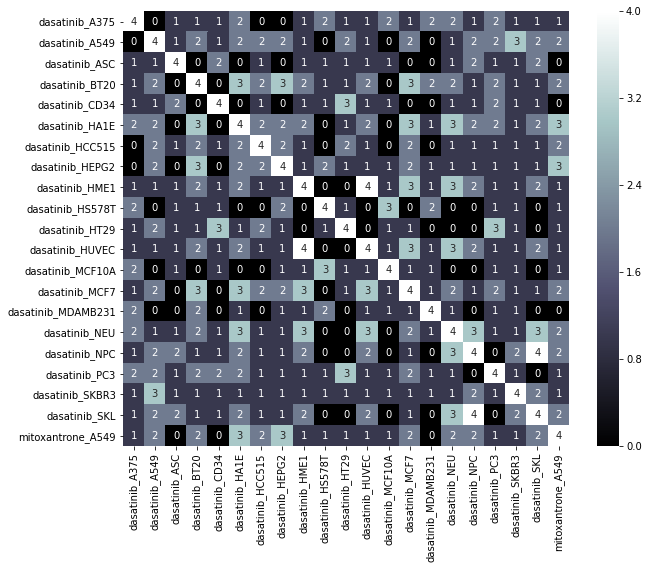

In [140]:
f, agg = volta.plotting.plot_agreement_matrix(consensus, xlabels=labels, ylabels=labels, annotation=True)

As we can see there are only 2 pairs that belong together on which all metrics agree on.

A Consensus Clustering is created from the individually performed clusterings. Please refer to the documentation for further information

In [146]:
merged_clusterings = []

for key in clusterings.keys():
    for c in clusterings[key]:
        
        merged_clusterings.append(c.tolist())

In [147]:
consensus = volta.clustering.consensus_clustering(merged_clusterings, seed=1234, threshold="matrix", per_node=False, rep = 10)

matrix
rerun


In [148]:
consensus

array([0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1])

To show the complete clustering we estimate a mean combined distance matrix and plot the clustering on top of it.

In [149]:
mean_dist_combined = volta.clustering.create_median_distance_matrix(distances, set_diagonal = True)

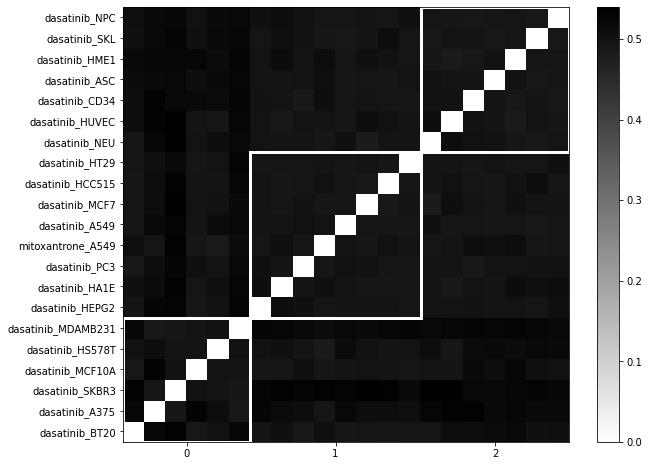

In [150]:
fig = volta.plotting.plot_clustering_heatmap(consensus, mean_dist_combined, labels, cmap="binary")

By tweaking the treshold or using another method, it is possible to tune the consensus based on your needs (you can also use the multiobjective function again to evaluate the consensus numerically)

In [151]:
max(consensus)+1

3

In [152]:
df = pd.DataFrame(list(zip(labels, consensus)), 
               columns =['CHEMICAL', 'CLUSTER'])

In [153]:
#view clustering
df

,CHEMICAL,CLUSTER
0,dasatinib_A375,0
1,dasatinib_A549,1
2,dasatinib_ASC,2
3,dasatinib_BT20,0
4,dasatinib_CD34,2
5,dasatinib_HA1E,1
6,dasatinib_HCC515,1
7,dasatinib_HEPG2,1
8,dasatinib_HME1,2
9,dasatinib_HS578T,0


In [ ]:
#save clustering for later. It can be used as input for the common subgraph pipeline

df.to_csv(location+"clustering_networks.csv", index=None)

In [132]:
all_consensus = [consensus_nodes, consensus_edges, consensus_structural, consensus_walks, consensus]

In [142]:
group_labels = ["nodes", "edges", "structural", "walks", "combined"]

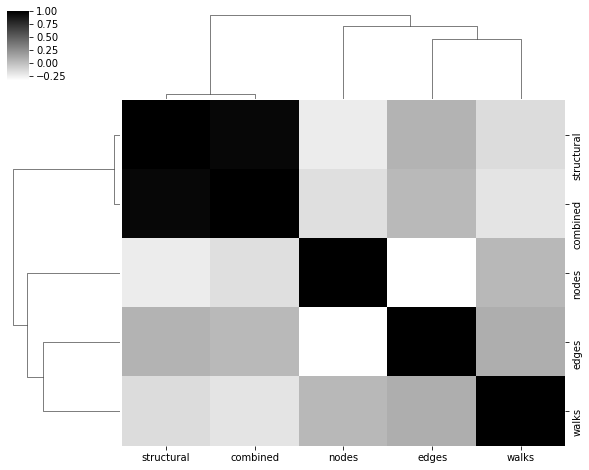

In [144]:
f, c = volta.plotting.plot_correlation_clusterings(all_consensus, xlabels=group_labels, ylabels=group_labels, size=(10,8), cmap="binary")